In [1]:
import sys, os, time, json, pickle
from timeit import default_timer as timer
from humanfriendly import format_timespan
from glob import glob

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
from dotenv import load_dotenv
load_dotenv('admin.env')

True

In [5]:
from mysql_connect import get_db_connection
db = get_db_connection('jp_autoreview')

In [6]:
start = timer()
df = db.read_sql(db.tables['pipeline_tests'].select())
print(format_timespan(timer()-start))

26.55 seconds


In [7]:
df.set_index('id', inplace=True)

In [8]:
top_results = df.sort_values('score_correctly_predicted', ascending=False).drop_duplicates(['review_paper_id', 'random_seed'])

In [9]:
def get_paper_info(datadir):
    g = glob(os.path.join(datadir, '..', '*paperinfo.json'))
    if len(g) != 1:
        raise RuntimeError("failed to find paper info")
    return pd.read_json(os.path.join(g[0]), typ='series')

In [10]:
start = timer()
data = []
for id, row in top_results.iterrows():
    this_row_data = get_paper_info(row.datadir)
    this_row_data['id'] = id
    data.append(this_row_data)
paperinfo = pd.DataFrame(data).set_index('id')
print(format_timespan(timer()-start))

1 minute and 9.72 seconds


In [11]:
top_results = top_results.join(paperinfo[['wos_title', 'mag_EF', 'doi', 'wos_title_source']])

In [12]:
top_results.drop_duplicates('review_paper_id')

,datetime_added,review_paper_id,random_seed,datadir,num_correctly_predicted,num_target_papers,num_target_in_candidates,num_seed_papers,score_correctly_predicted,num_candidates,features,clf,clf_type,time_fit,time_predict,saved_model,wos_title,mag_EF,doi,wos_title_source
id,,,,,,,,,,,,,,,,,,,,
90617,2018-07-07 04:42:46,2071171979,5,data/review_2071171979/seed_005,79,104,103,50,0.759615,12698,"['avg_distance_to_train', 'ef', 'avg_title_tfi...","RandomForestClassifier(bootstrap=True, class_w...",RandomForestClassifier,28,18,None,Wing-in-ground effect vehicles,6.930000e-08,10.1016/j.paerosci.2006.10.001,PROGRESS IN AEROSPACE SCIENCES
42194,2018-06-26 23:22:32,783250631,2,data/review_783250631/seed_002,292,413,404,50,0.707022,640600,"['avg_distance_to_train', 'ef', 'avg_title_tfi...","RandomForestClassifier(bootstrap=True, class_w...",RandomForestClassifier,1485,1341,data/review_783250631/seed_002/best_model_2018...,A Coffee Berry Borer (Coleoptera: Curculionida...,5.800000e-09,10.1093/jisesa/iev053,JOURNAL OF INSECT SCIENCE
72100,2018-07-03 04:55:32,2026986848,1,data/review_2026986848/seed_001,18,26,24,50,0.692308,427772,"['avg_distance_to_train', 'ef', 'avg_title_tfi...","RandomForestClassifier(bootstrap=True, class_w...",RandomForestClassifier,437,476,data/review_2026986848/seed_001/best_model_201...,Dye-Sensitized Solar Cells,1.069500e-06,10.1021/cr900356p,CHEMICAL REVIEWS
44031,2018-06-27 19:10:58,2031246464,3,data/review_2031246464/seed_003,841,1273,1256,50,0.660644,123828,"['avg_distance_to_train', 'ef', 'avg_title_tfi...","RandomForestClassifier(bootstrap=True, class_w...",RandomForestClassifier,372,231,data/review_2031246464/seed_003/best_model_201...,Molecular imprinting science and technology: a...,1.568000e-07,10.1002/jmr.760,JOURNAL OF MOLECULAR RECOGNITION
48887,2018-06-28 04:07:17,2156979070,4,data/review_2156979070/seed_004,880,1335,1328,50,0.659176,627188,"['avg_distance_to_train', 'ef', 'avg_title_tfi...","RandomForestClassifier(bootstrap=True, class_w...",RandomForestClassifier,2241,1055,data/review_2156979070/seed_004/best_model_201...,Pituitary Adenylate Cyclase-Activating Polypep...,6.520000e-08,10.1124/pr.109.001370,PHARMACOLOGICAL REVIEWS
64366,2018-07-01 20:59:23,2513883627,5,data/review_2513883627/seed_005,409,653,649,50,0.626340,102376,"['avg_distance_to_train', 'ef', 'avg_title_tfi...","RandomForestClassifier(bootstrap=True, class_w...",RandomForestClassifier,131,120,data/review_2513883627/seed_005/best_model_201...,Which method is best for the induction of labo...,7.300000e-09,10.3310/hta20650,HEALTH TECHNOLOGY ASSESSMENT
62011,2018-07-01 10:34:47,2334595206,1,data/review_2334595206/seed_001,413,681,677,50,0.606461,157684,"['avg_distance_to_train', 'ef', 'avg_title_tfi...","RandomForestClassifier(bootstrap=True, class_w...",RandomForestClassifier,466,295,data/review_2334595206/seed_001/best_model_201...,Meliaceous Limonoids: Chemistry and Biological...,5.310000e-08,10.1021/cr9004023,CHEMICAL REVIEWS
91096,2018-07-07 01:31:13,2087588672,5,data/review_2087588672/seed_005,419,697,693,50,0.601148,444287,"['avg_distance_to_train', 'ef', 'avg_title_tfi...","RandomForestClassifier(bootstrap=True, class_w...",RandomForestClassifier,622,541,data/review_2087588672/seed_005/best_model_201...,Structure and function of the vomeronasal syst...,7.820000e-08,10.1016/S0301-0082(03)00103-5,PROGRESS IN NEUROBIOLOGY
50641,2018-06-29 04:52:11,1995191254,4,data/review_1995191254/seed_004,593,989,986,50,0.599596,94604,"['avg_distance_to_train', 'ef', 'avg_title_tfi...","RandomForestClassifier(bootstrap=True, class_w...",RandomForestClassifier,324,142,data/review_1995191254/seed_004/best_model_201...,Surface chemistry of atomic layer deposition: ...,4.328000e-07,10.1063/1.1940727,JOURNAL OF APPLIED PHYSICS


In [13]:
wos_source = pd.read_table('data/wos_title_sources_subjects.tsv')

In [14]:
gb = wos_source.groupby('title_source')
wos_source['num_entries'] = wos_source.title_source.map(gb.title_source.count())

In [15]:
wos_source.sort_values(['num_entries', 'title_source'], ascending=[False, True])

,title_source,title_source_abbrev,subject_extended,subject_traditional,heading,subheading,num_entries
23655,ARTIFICIAL INTELLIGENCE IN EDUCATION,FR ART INT,Computer Science,"Computer Science, Artificial Intelligence; Com...",Science & Technology,Technology,9.0
23656,ARTIFICIAL INTELLIGENCE IN EDUCATION,FR ART INT,Computer Science,"Computer Science, Artificial Intelligence; Com...",Science & Technology,Technology,9.0
23657,ARTIFICIAL INTELLIGENCE IN EDUCATION,FR ART INT,Computer Science; Education & Educational Rese...,"Computer Science, Artificial Intelligence; Com...",Science & Technology,Technology,9.0
23658,ARTIFICIAL INTELLIGENCE IN EDUCATION,FR ART INT,Computer Science; Education & Educational Rese...,"Computer Science, Artificial Intelligence; Com...",Science & Technology,Technology,9.0
23659,ARTIFICIAL INTELLIGENCE IN EDUCATION,FRONT ARTIF INTEL AP,Computer Science,"Computer Science, Artificial Intelligence; Com...",Science & Technology,Technology,9.0
23660,ARTIFICIAL INTELLIGENCE IN EDUCATION,FRONT ARTIF INTEL AP,Computer Science,"Computer Science, Artificial Intelligence; Com...",Science & Technology,Technology,9.0
23661,ARTIFICIAL INTELLIGENCE IN EDUCATION,FRONT ARTIF INTEL AP,Computer Science; Education & Educational Rese...,"Computer Science, Artificial Intelligence; Com...",Science & Technology,Technology,9.0
23662,ARTIFICIAL INTELLIGENCE IN EDUCATION,FRONT ARTIF INTEL AP,Computer Science; Education & Educational Rese...,"Computer Science, Artificial Intelligence; Com...",Science & Technology,Technology,9.0
23663,ARTIFICIAL INTELLIGENCE IN EDUCATION,LECT NOTES ARTIF INT,Computer Science,"Computer Science, Artificial Intelligence; Com...",Science & Technology,Technology,9.0
73902,HIGH PERFORMANCE COMPUTING SYSTEMS AND APPLICA...,NaN,Computer Science,"Computer Science, Interdisciplinary Applicatio...",Science & Technology,Technology,9.0


In [16]:
wos_source.nunique()

title_source           164411
title_source_abbrev     31732
subject_extended        11638
subject_traditional     20956
heading                     3
subheading                  3
num_entries                 9
dtype: int64

In [17]:
wos_source[['title_source', 'heading', 'subheading', 'num_entries']].drop_duplicates()

,title_source,heading,subheading,num_entries
0,NaN,NaN,NaN,NaN
1,'92 ELECTROWEAK INTERACTIONS AND UNIFIED THEORIES,Science & Technology,Physical Sciences,1.0
2,'93 ELECTROWEAK INTERACTIONS AND UNIFIED THEORIES,Science & Technology,Physical Sciences,1.0
3,'94 ELECTROWEAK INTERACTIONS AND UNIFIED THEORIES,Science & Technology,Physical Sciences,1.0
4,'95 ELECTROWEAK INTERACTIONS AND UNIFIED THEORIES,Science & Technology,Physical Sciences,1.0
5,'95 QCD AND HIGH ENERGY HADRONIC INTERACTIONS,Science & Technology,Physical Sciences,1.0
6,"'96 CHINA-JAPAN SYMPOSIUM ON PARTICUOLOGY, PRO...",Science & Technology,Technology,1.0
7,'97 NANJING INTERNATIONAL SYMPOSIUM ON HIGH YI...,Science & Technology,Technology,1.0
8,'99 INTERNATIONAL CONFERENCE ON MANAGEMENT SCI...,Science & Technology,Technology,1.0
9,'ABBASID STUDIES,Arts & Humanities,NaN,1.0


In [18]:
top_results = top_results.merge(wos_source.drop_duplicates(subset=['title_source']), how='left', left_on='wos_title_source', right_on='title_source')

In [19]:
x = top_results.drop_duplicates('review_paper_id').dropna(subset=['heading']).reset_index()
x[x.heading=="Science & Technology"]

,index,datetime_added,review_paper_id,random_seed,datadir,num_correctly_predicted,num_target_papers,num_target_in_candidates,num_seed_papers,score_correctly_predicted,...,mag_EF,doi,wos_title_source,title_source,title_source_abbrev,subject_extended,subject_traditional,heading,subheading,num_entries
0,0,2018-07-07 04:42:46,2071171979,5,data/review_2071171979/seed_005,79,104,103,50,0.759615,...,6.930000e-08,10.1016/j.paerosci.2006.10.001,PROGRESS IN AEROSPACE SCIENCES,PROGRESS IN AEROSPACE SCIENCES,PROG AEROSP SCI,Engineering,"Engineering, Aerospace",Science & Technology,Technology,1.0
1,3,2018-06-26 23:22:32,783250631,2,data/review_783250631/seed_002,292,413,404,50,0.707022,...,5.800000e-09,10.1093/jisesa/iev053,JOURNAL OF INSECT SCIENCE,JOURNAL OF INSECT SCIENCE,J INSECT SCI,Entomology,Entomology,Science & Technology,Life Sciences & Biomedicine,1.0
2,7,2018-07-03 04:55:32,2026986848,1,data/review_2026986848/seed_001,18,26,24,50,0.692308,...,1.069500e-06,10.1021/cr900356p,CHEMICAL REVIEWS,CHEMICAL REVIEWS,CHEM REV,Chemistry,"Chemistry, Multidisciplinary",Science & Technology,Physical Sciences,1.0
3,11,2018-06-27 19:10:58,2031246464,3,data/review_2031246464/seed_003,841,1273,1256,50,0.660644,...,1.568000e-07,10.1002/jmr.760,JOURNAL OF MOLECULAR RECOGNITION,JOURNAL OF MOLECULAR RECOGNITION,J MOL RECOGNIT,Biochemistry & Molecular Biology; Biophysics,Biochemistry & Molecular Biology; Biophysics,Science & Technology,Life Sciences & Biomedicine,1.0
4,12,2018-06-28 04:07:17,2156979070,4,data/review_2156979070/seed_004,880,1335,1328,50,0.659176,...,6.520000e-08,10.1124/pr.109.001370,PHARMACOLOGICAL REVIEWS,PHARMACOLOGICAL REVIEWS,PHARMACOL REV,Pharmacology & Pharmacy,Pharmacology & Pharmacy,Science & Technology,Life Sciences & Biomedicine,1.0
5,21,2018-07-01 20:59:23,2513883627,5,data/review_2513883627/seed_005,409,653,649,50,0.626340,...,7.300000e-09,10.3310/hta20650,HEALTH TECHNOLOGY ASSESSMENT,HEALTH TECHNOLOGY ASSESSMENT,HEALTH TECHNOL ASSES,Health Care Sciences & Services,Health Care Sciences & Services,Science & Technology,Life Sciences & Biomedicine,1.0
6,23,2018-07-01 10:34:47,2334595206,1,data/review_2334595206/seed_001,413,681,677,50,0.606461,...,5.310000e-08,10.1021/cr9004023,CHEMICAL REVIEWS,CHEMICAL REVIEWS,CHEM REV,Chemistry,"Chemistry, Multidisciplinary",Science & Technology,Physical Sciences,1.0
7,25,2018-07-07 01:31:13,2087588672,5,data/review_2087588672/seed_005,419,697,693,50,0.601148,...,7.820000e-08,10.1016/S0301-0082(03)00103-5,PROGRESS IN NEUROBIOLOGY,PROGRESS IN NEUROBIOLOGY,PROG NEUROBIOL,Neurosciences & Neurology,Neurosciences,Science & Technology,Life Sciences & Biomedicine,1.0
8,26,2018-06-29 04:52:11,1995191254,4,data/review_1995191254/seed_004,593,989,986,50,0.599596,...,4.328000e-07,10.1063/1.1940727,JOURNAL OF APPLIED PHYSICS,JOURNAL OF APPLIED PHYSICS,J APPL PHYS,Physics,"Physics, Applied",Science & Technology,Physical Sciences,1.0
9,29,2018-07-02 02:27:39,2321077391,3,data/review_2321077391/seed_003,498,832,832,50,0.598558,...,6.590000e-08,10.1021/cr500249p,CHEMICAL REVIEWS,CHEMICAL REVIEWS,CHEM REV,Chemistry,"Chemistry, Multidisciplinary",Science & Technology,Physical Sciences,1.0


In [20]:
x = top_results.drop_duplicates('review_paper_id')
x[x.heading.isna()]

,datetime_added,review_paper_id,random_seed,datadir,num_correctly_predicted,num_target_papers,num_target_in_candidates,num_seed_papers,score_correctly_predicted,num_candidates,...,mag_EF,doi,wos_title_source,title_source,title_source_abbrev,subject_extended,subject_traditional,heading,subheading,num_entries
272,2018-07-08 12:28:04,1973613674,5,data/review_1973613674/seed_005,292,661,660,50,0.441755,232032,...,1.280000e-08,10.1167/11.5.11,JOURNAL OF VISION,JOURNAL OF VISION,J VISION,NaN,NaN,NaN,NaN,2.0
919,2018-07-09 10:33:56,2103258766,2,data/review_2103258766/seed_002,244,706,693,50,0.345609,152346,...,1.123000e-07,10.1136/thx.2008.101691,THORAX,THORAX,THORAX,NaN,NaN,NaN,NaN,2.0
957,2018-07-04 16:16:57,2109712401,3,data/review_2109712401/seed_003,275,803,799,50,0.342466,729380,...,1.185200e-06,10.1161/CIRCULATIONAHA.109.192065,CIRCULATION,CIRCULATION,CIRCULATION,NaN,NaN,NaN,NaN,2.0
996,2018-07-03 14:26:46,1907369419,5,data/review_1907369419/seed_005,258,761,761,50,0.339028,300618,...,1.975000e-07,10.1002/jgrd.50171,JOURNAL OF GEOPHYSICAL RESEARCH-ATMOSPHERES,JOURNAL OF GEOPHYSICAL RESEARCH-ATMOSPHERES,J GEOPHYS RES-ATMOS,NaN,NaN,NaN,NaN,2.0
1063,2018-07-01 04:45:19,2424173776,5,data/review_2424173776/seed_005,313,939,938,50,0.333333,493682,...,9.100000e-09,10.1002/aenm.201502159,ADVANCED ENERGY MATERIALS,ADVANCED ENERGY MATERIALS,ADV ENERGY MATER,NaN,NaN,NaN,NaN,2.0
1080,2018-06-28 00:16:39,2028756415,3,data/review_2028756415/seed_003,466,1404,1402,50,0.331909,591395,...,3.410000e-08,10.1186/1471-244X-14-S1-S1,BMC PSYCHIATRY,BMC PSYCHIATRY,BMC PSYCHIATRY,NaN,NaN,NaN,NaN,2.0
1685,2018-06-28 09:09:05,2214094658,2,data/review_2214094658/seed_002,223,807,801,50,0.276332,176731,...,3.043000e-07,10.1161/CIRCULATIONAHA.105.166550,CIRCULATION,CIRCULATION,CIRCULATION,NaN,NaN,NaN,NaN,2.0
2238,2018-07-08 00:43:28,2146960414,1,data/review_2146960414/seed_001,216,1007,955,50,0.214499,321813,...,3.060000e-07,10.1136/thx.2008.097741,THORAX,THORAX,THORAX,NaN,NaN,NaN,NaN,2.0


In [21]:
df.nunique()

datetime_added                4210
review_paper_id                592
random_seed                      5
datadir                       2940
num_correctly_predicted        952
num_target_papers              431
num_target_in_candidates       731
num_seed_papers                  1
score_correctly_predicted    32703
num_candidates                2937
features                         2
clf                             12
clf_type                         6
time_fit                      5203
time_predict                  2939
saved_model                   5792
dtype: int64

In [22]:
top_results.mean().apply(lambda x: format(x, 'f'))

review_paper_id              2101535218.191837
random_seed                           2.998299
num_correctly_predicted             249.144558
num_target_papers                   874.791837
num_target_in_candidates            864.729592
num_seed_papers                      50.000000
score_correctly_predicted             0.297079
num_candidates                   547688.345238
time_fit                           1799.724150
time_predict                        822.068707
mag_EF                                0.000000
num_entries                           1.085034
dtype: object

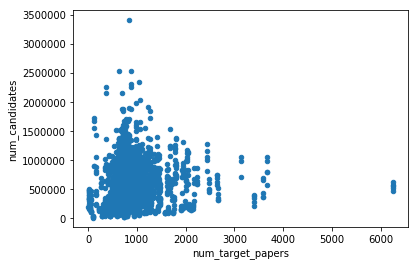

In [23]:
top_results.plot.scatter(x='num_target_papers', y='num_candidates')

(0, 1000000.0)

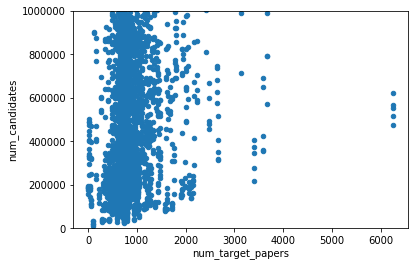

In [24]:
top_results.plot.scatter(x='num_target_papers', y='num_candidates').set_ylim(0,1e6)

In [25]:
top_results.corr()

,review_paper_id,random_seed,num_correctly_predicted,num_target_papers,num_target_in_candidates,num_seed_papers,score_correctly_predicted,num_candidates,time_fit,time_predict,mag_EF,num_entries
review_paper_id,1.000000,-0.000829,0.025489,0.027188,0.028520,NaN,-0.011262,-0.013148,-0.010077,-0.016216,-0.037051,-0.022899
random_seed,-0.000829,1.000000,0.003795,0.004586,0.004944,NaN,0.004028,-0.004734,-0.005080,-0.007172,0.000503,0.000285
num_correctly_predicted,0.025489,0.003795,1.000000,0.608276,0.631483,NaN,0.513920,-0.011428,0.009416,0.040964,-0.005217,-0.086808
num_target_papers,0.027188,0.004586,0.608276,1.000000,0.989241,NaN,-0.202786,0.082664,0.146773,0.170546,-0.053576,0.053886
num_target_in_candidates,0.028520,0.004944,0.631483,0.989241,1.000000,NaN,-0.187585,0.098281,0.161173,0.187469,-0.059586,0.058581
num_seed_papers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
score_correctly_predicted,-0.011262,0.004028,0.513920,-0.202786,-0.187585,NaN,1.000000,-0.147985,-0.160724,-0.156889,0.111829,-0.180003
num_candidates,-0.013148,-0.004734,-0.011428,0.082664,0.098281,NaN,-0.147985,1.000000,0.825326,0.917739,-0.045903,0.009622
time_fit,-0.010077,-0.005080,0.009416,0.146773,0.161173,NaN,-0.160724,0.825326,1.000000,0.892394,-0.034366,0.026904
time_predict,-0.016216,-0.007172,0.040964,0.170546,0.187469,NaN,-0.156889,0.917739,0.892394,1.000000,-0.048942,0.028097


In [26]:
num_target_not_in_candidate = top_results.num_target_papers - top_results.num_target_in_candidates
num_target_not_in_candidate.value_counts().sort_index()

0       1036
1        647
2        341
3        231
4        172
5        121
6         74
7         63
8         32
9         34
10        15
11        12
12        19
13        13
14        16
15         7
16         6
17         2
18         1
19         7
20         3
21         3
23         3
24         5
25         2
52         4
53         1
60         1
62         1
63         1
        ... 
117        1
118        1
122        1
131        1
134        3
136        1
156        1
159        4
249        2
251        1
253        1
254        1
330        2
331        3
501        1
506        2
507        1
511        1
623        1
628        1
629        1
630        1
632        1
727        4
728        1
1281       1
1283       1
1287       1
1289       1
1292       1
Length: 74, dtype: int64

In [27]:
def get_subj_ext_first(subj_ext):
    if pd.notnull(subj_ext):
        split = subj_ext.split('; ')
        return split[0]
    return None
top_results['subject_extended_first'] = top_results.subject_extended.apply(get_subj_ext_first)

In [28]:
top_results.subject_extended_first.value_counts()

Chemistry                                     960
Physiology                                    315
Physics                                       245
Biochemistry & Molecular Biology              210
Pharmacology & Pharmacy                       190
Neurosciences & Neurology                     160
Materials Science                             110
Microbiology                                   85
Endocrinology & Metabolism                     55
Cardiovascular System & Cardiology             36
Environmental Sciences & Ecology               35
Thermodynamics                                 30
General & Internal Medicine                    30
Engineering                                    30
Behavioral Sciences                            25
Plant Sciences                                 25
Oncology                                       20
Life Sciences & Biomedicine - Other Topics     20
Polymer Science                                20
Geology                                        20


In [29]:
top_results[top_results.subject_extended_first=='Computer Science'][['review_paper_id', 'num_target_papers', 'score_correctly_predicted', 'num_candidates', 'wos_title', 'wos_title_source', 'subject_extended']]

,review_paper_id,num_target_papers,score_correctly_predicted,num_candidates,wos_title,wos_title_source,subject_extended
751,2076063813,873,0.364261,1348977,Deep learning in neural networks: An overview,NEURAL NETWORKS,Computer Science
1076,2076063813,873,0.332188,2312499,Deep learning in neural networks: An overview,NEURAL NETWORKS,Computer Science
1088,2076063813,873,0.331042,2253791,Deep learning in neural networks: An overview,NEURAL NETWORKS,Computer Science
1152,2076063813,873,0.325315,1880183,Deep learning in neural networks: An overview,NEURAL NETWORKS,Computer Science
1153,2076063813,873,0.325315,2523591,Deep learning in neural networks: An overview,NEURAL NETWORKS,Computer Science


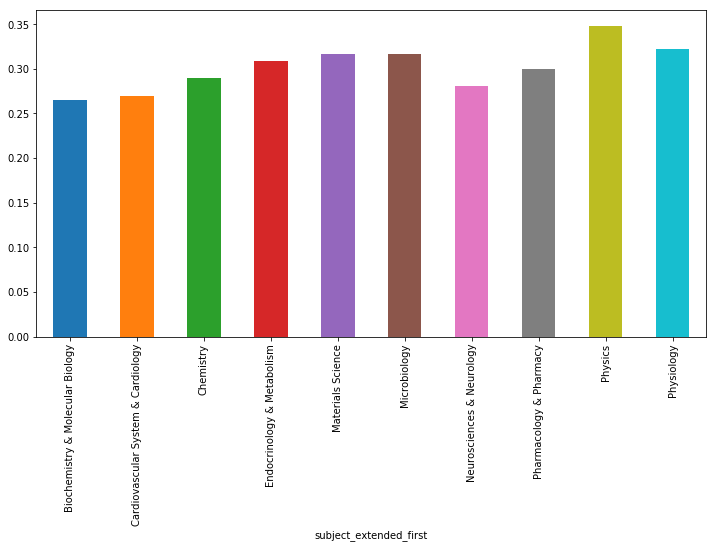

In [30]:
top10 = top_results.subject_extended_first.value_counts()[:10].index
x = top_results[top_results.subject_extended_first.isin(top10)]
gb = x.groupby('subject_extended_first')
plt.figure(figsize=(12,6))
gbmean = gb['score_correctly_predicted'].mean()
gbmean.plot.bar()

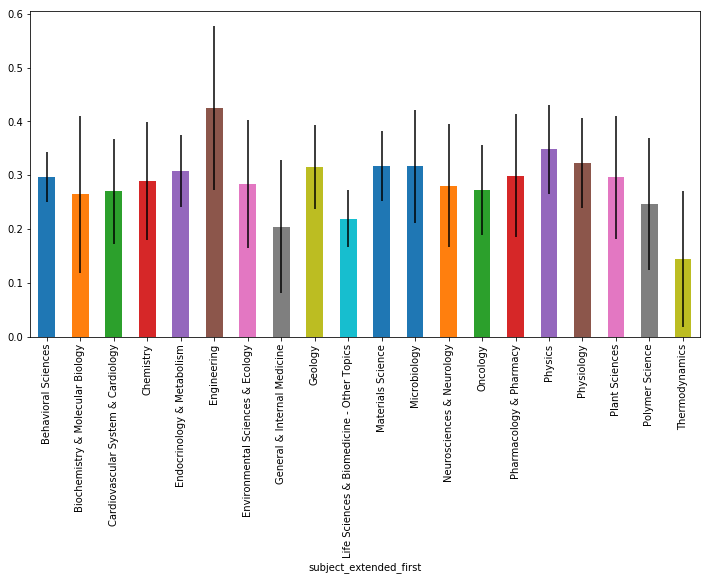

In [31]:
top20 = top_results.subject_extended_first.value_counts()[:20].index
x = top_results[top_results.subject_extended_first.isin(top20)]
gb = x.groupby('subject_extended_first')
plt.figure(figsize=(12,6))
gbmean = gb['score_correctly_predicted'].mean()
gberrs = gb['score_correctly_predicted'].std()
gbmean.plot.bar(yerr=gberrs)

In [32]:
top_results[top_results.num_target_papers>50].score_correctly_predicted.describe()

count    2914.000000
mean        0.296454
std         0.111043
min         0.004098
25%         0.219860
50%         0.298644
75%         0.365208
max         0.759615
Name: score_correctly_predicted, dtype: float64